In [1]:
import pandas as pd
import math
import warnings
import yfinance as yf
import QuantLib as ql
from datetime import timedelta
from HestonModel import Heston, HestonPriceFunction
from V4 import HestonParameters, get_metrics, calculate_expected_variance_over_strikes
warnings.filterwarnings("ignore")


heston = Heston()
heston.load_data('Data/20230912_PLIQ_IP.csv')
heston.preprocess_data()
heston.clean['Spot'] = heston.clean.Futuro * (-heston.clean['Tasa de Interes'] * heston.clean['Plazo a Vencimiento']).apply(lambda x: math.exp(x))
heston.clean

,Fecha,TV,Emisora,Serie,Vencimiento,Tasa de Interes,Plazo a Vencimiento,Futuro,Pliq,Bid,Ask,Call o Put,Hubo Bid/Ask,Volatilidad,V. Teorico,Mes_vencimiento,Spot
0,2023-09-12,OI,IP,40000,C,0.119300,0.513889,53969,15676.0,0.0,0.0,0,0,0.587818,15676.291368,3,50759.706626
1,2023-09-12,OI,IP,40500,C,0.119300,0.513889,53969,15295.0,0.0,0.0,0,0,0.581875,15294.629056,3,50759.706626
2,2023-09-12,OI,IP,41000,C,0.119300,0.513889,53969,14915.0,0.0,0.0,0,0,0.575899,14914.803711,3,50759.706626
3,2023-09-12,OI,IP,41500,C,0.119300,0.513889,53969,14537.0,0.0,0.0,0,0,0.569911,14537.058921,3,50759.706626
4,2023-09-12,OI,IP,42000,C,0.119300,0.513889,53969,14161.0,0.0,0.0,0,0,0.563888,14161.207052,3,50759.706626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2023-09-12,OI,IP,68000,X,0.116797,0.261111,52515,15685.0,0.0,0.0,1,0,0.417201,15685.461471,12,50937.625186
484,2023-09-12,OI,IP,68500,X,0.116797,0.261111,52515,16165.0,0.0,0.0,1,0,0.424280,16165.480807,12,50937.625186
485,2023-09-12,OI,IP,69000,X,0.116797,0.261111,52515,16646.0,0.0,0.0,1,0,0.431235,16645.517159,12,50937.625186
486,2023-09-12,OI,IP,69500,X,0.116797,0.261111,52515,17126.0,0.0,0.0,1,0,0.438069,17125.566692,12,50937.625186


In [16]:
import numpy as np
np.percentile(calls.volume, .5)

1.0

In [24]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Maturity,TTM,Price
0,GOOGL231124C00070000,"October 20th, 2023",70.0,66.51,57.40,60.60,0.00,0.000000,16.0,16,1.868165,True,REGULAR,USD,"November 24th, 2023",0.093151,135.600006
1,GOOGL231124C00118000,"November 1st, 2023",118.0,8.90,11.50,11.90,0.00,0.000000,11.0,52,0.365729,True,REGULAR,USD,"November 24th, 2023",0.060274,126.449997
2,GOOGL231124C00120000,"November 3rd, 2023",120.0,9.94,9.80,9.95,1.19,13.599995,205.0,159,0.324958,True,REGULAR,USD,"November 24th, 2023",0.054795,129.100006
3,GOOGL231124C00123000,"November 3rd, 2023",123.0,7.10,6.95,7.30,1.10,18.333332,35.0,320,0.290534,True,REGULAR,USD,"November 24th, 2023",0.054795,129.100006
4,GOOGL231124C00125000,"November 3rd, 2023",125.0,5.54,5.45,5.65,0.92,19.913422,99.0,1075,0.268806,True,REGULAR,USD,"November 24th, 2023",0.054795,129.100006
5,GOOGL231124C00126000,"November 3rd, 2023",126.0,4.80,4.65,4.90,0.75,18.518518,84.0,837,0.260872,True,REGULAR,USD,"November 24th, 2023",0.054795,129.100006
6,GOOGL231124C00127000,"November 3rd, 2023",127.0,4.05,4.00,4.15,0.70,20.895533,81.0,484,0.249519,True,REGULAR,USD,"November 24th, 2023",0.054795,129.100006
7,GOOGL231124C00128000,"November 3rd, 2023",128.0,3.43,3.35,3.45,0.81,30.916039,213.0,314,0.238777,True,REGULAR,USD,"November 24th, 2023",0.054795,129.100006
8,GOOGL231124C00129000,"November 3rd, 2023",129.0,2.82,2.70,2.87,0.65,29.953909,334.0,282,0.233894,True,REGULAR,USD,"November 24th, 2023",0.054795,129.100006
9,GOOGL231124C00130000,"November 3rd, 2023",130.0,2.27,2.21,2.33,0.48,26.815643,4054.0,1100,0.227791,False,REGULAR,USD,"November 24th, 2023",0.054795,129.100006


<Axes: xlabel='Strike_Price'>

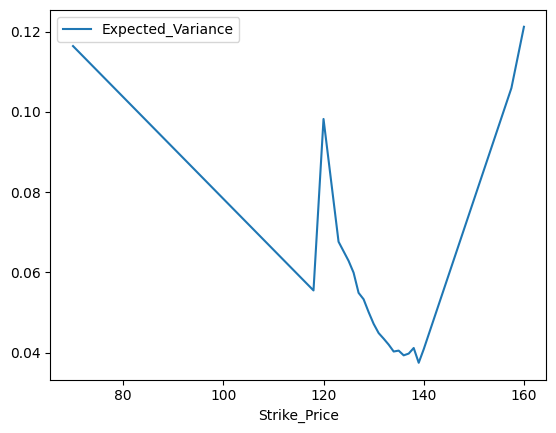

In [23]:
# CALLS
ticker_symbol = 'GOOGL'
ticker_data = yf.Ticker(ticker_symbol)
options_expirations = ticker_data.options
expiration_date = options_expirations[2]
options_chain = ticker_data.option_chain(expiration_date)
calls = options_chain.calls
puts = options_chain.puts
calls = calls.dropna()
calls = calls[calls['volume']  > 10]
calls['Maturity'] = expiration_date
calls['Maturity'] = pd.to_datetime(calls['Maturity'])
calls['lastTradeDate'] = pd.to_datetime(calls['lastTradeDate']).dt.tz_localize(None)
calls['TTM'] = (pd.to_datetime(calls['Maturity']) - calls['lastTradeDate']).dt.days / 365.0

def to_ql_dates(date):
    date = pd.to_datetime(date)
    return ql.Date(date.day, date.month, date.year)

trade_dates = calls['lastTradeDate']
start_date, end_date = trade_dates.min(), trade_dates.max()
end_date = end_date + timedelta(days = 1)
prices = yf.download(ticker_symbol, start = start_date, end = end_date, progress = False)['Adj Close'].reset_index()
calls['lastTradeDate'] = calls['lastTradeDate'].apply(lambda x: x.strftime('%Y-%m-%d'))
prices['Date'] = prices['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
calls = calls.merge(prices, left_on = 'lastTradeDate', right_on = 'Date', how = 'left').drop('Date', axis = 1).rename( columns = {'Adj Close':'Price'})
calls['lastTradeDate'] = calls['lastTradeDate'].apply(to_ql_dates)
calls['Maturity'] = calls['Maturity'].apply(to_ql_dates)

spots = calls['Price'].values
strikes = calls['strike'].values
mkts = calls['lastPrice'].values
dividend = .00
vols = calls['impliedVolatility'].values
calc = calls['lastTradeDate'].values
maturities = calls['Maturity'].values
ttms = calls['TTM'].values


results = [HestonParameters(spot_price, strike_price, market_price, dividend, traditional_implied_volatility, calculation_date, maturity_date, ttm) for 
spot_price, strike_price, market_price, traditional_implied_volatility, calculation_date, maturity_date, ttm in zip(spots, strikes, mkts, vols, calc, maturities, ttms)]
metrics = get_metrics(results)


combined_results_df = pd.concat(results, ignore_index=True).dropna()
# Now you can calculate the expected variance over strikes
expected_variance_df = calculate_expected_variance_over_strikes(combined_results_df)
expected_variance_df.plot()

In [22]:
expected_variance_df.to_excel('Volatilidad_AAPL.xlsx')

<Axes: xlabel='Strike_Price'>

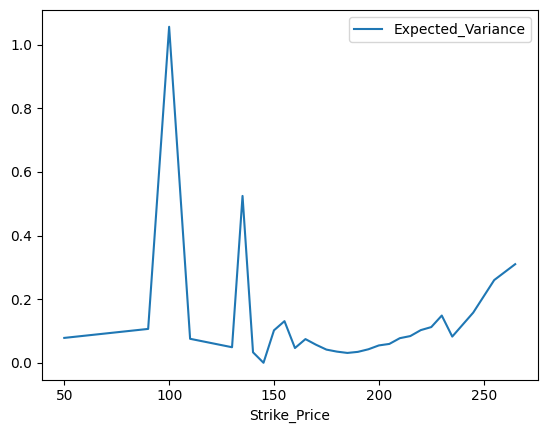

<Axes: xlabel='Strike'>

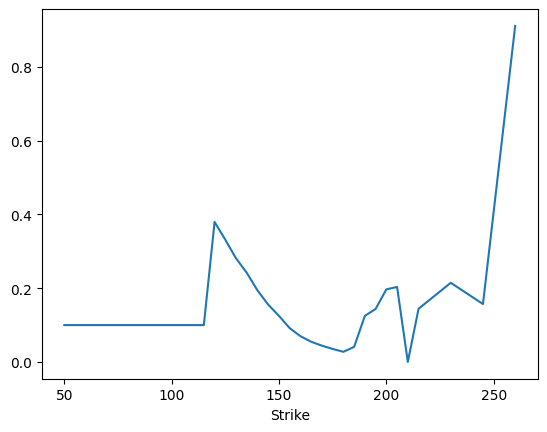

In [219]:
v0_df = pd.concat(results, axis = 0)
v0_df = v0_df[v0_df['Success']==True]
v0_df.Params = v0_df.Params.apply(lambda x: x[0])
v0_df.set_index('Strike').Params.plot()

In [213]:
from datetime import timedelta
# Definir el ticker para Google

ticker_symbol = 'AAPL'
ticker_data = yf.Ticker(ticker_symbol)
options_expirations = ticker_data.options
expiration_date = options_expirations[2]
options_chain = ticker_data.option_chain(expiration_date)
calls = options_chain.calls
puts = options_chain.puts
puts['Maturity'] = expiration_date

def to_ql_dates(date):
    date = pd.to_datetime(date)
    return ql.Date(date.day, date.month, date.year)

trade_dates = puts['lastTradeDate']
start_date, end_date = trade_dates.min(), trade_dates.max()
end_date = end_date + timedelta(days = 1)
prices = yf.download(ticker_symbol, start = start_date, end = end_date, progress = False)['Adj Close'].reset_index()
puts['lastTradeDate'] = puts['lastTradeDate'].apply(lambda x: x.strftime('%Y-%m-%d'))
prices['Date'] = prices['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
puts = puts.merge(prices, left_on = 'lastTradeDate', right_on = 'Date', how = 'left').drop('Date', axis = 1).rename( columns = {'Adj Close':'Price'})
puts['lastTradeDate'] = puts['lastTradeDate'].apply(to_ql_dates)
puts['Maturity'] = puts['Maturity'].apply(to_ql_dates)

spots = puts['Price'].values
strikes = puts['strike'].values
mkts = puts['lastPrice'].values
dividend = .0
vols = puts['impliedVolatility'].values
calc = puts['lastTradeDate'].values
maturities = puts['Maturity'].values


results = [HestonParameters(spot_price, strike_price, market_price, dividend, traditional_implied_volatility, calculation_date, maturity_date, call_option = False) for 
spot_price, strike_price, market_price, traditional_implied_volatility, calculation_date, maturity_date in zip(spots, strikes, mkts, vols, calc, maturities)]
get_metrics(results)

50.0
Optimizer TNC Estimated Price: 6.820682195484479e-13 Market Price: 0.01
75.0
Optimizer TNC Estimated Price: -3.619299858421748e-13 Market Price: 0.01
80.0
Optimizer TNC Estimated Price: -2.1887950779050534e-13 Market Price: 0.01
90.0
Optimizer TNC Estimated Price: 2.2806178603825614e-12 Market Price: 0.01
95.0
Optimizer TNC Estimated Price: -2.5696665812391084e-13 Market Price: 0.01
100.0
Optimizer TNC Estimated Price: 3.1774480275478633e-12 Market Price: 0.01
105.0
Optimizer TNC Estimated Price: 2.2545356677758378e-10 Market Price: 0.01
110.0
Optimizer TNC Estimated Price: 7.185804031921892e-10 Market Price: 0.01
115.0
Optimizer TNC Estimated Price: 1.605239303454808e-08 Market Price: 0.03
120.0
Optimizer TNC Estimated Price: 0.030000001909594065 Market Price: 0.03
125.0
Optimizer TNC Estimated Price: 0.03999982636317434 Market Price: 0.04
130.0
Optimizer TNC Estimated Price: 0.049986163642953496 Market Price: 0.05
135.0
Optimizer TNC Estimated Price: 0.0700003834802514 Market Pr

,Success,MSE
Optimizer,,
TNC,200.0%,0.041012


In [238]:
calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Maturity,TTM,Price
0,AAPL231124C00050000,"November 3rd, 2023",50.0,125.70,126.15,127.30,-1.730003,-1.357611,1.0,2,2.105473,True,REGULAR,USD,"November 24th, 2023",0.054795,176.649994
1,AAPL231124C00090000,"November 1st, 2023",90.0,81.35,86.20,87.30,0.000000,0.000000,1.0,1,1.207035,True,REGULAR,USD,"November 24th, 2023",0.060274,173.970001
2,AAPL231124C00095000,"October 25th, 2023",95.0,77.10,81.15,82.30,0.000000,0.000000,NaN,1,1.078130,True,REGULAR,USD,"November 24th, 2023",0.079452,171.100006
3,AAPL231124C00100000,"October 19th, 2023",100.0,78.02,76.15,77.30,0.000000,0.000000,32.0,19,0.996094,True,REGULAR,USD,"November 24th, 2023",0.095890,175.460007
4,AAPL231124C00105000,"October 25th, 2023",105.0,67.15,71.15,72.35,0.000000,0.000000,NaN,1,0.951172,True,REGULAR,USD,"November 24th, 2023",0.079452,171.100006


In [212]:
t = 1  # Time in years until option maturity
expected_variance_df = calculate_expected_variance_over_strikes(results_df, t)

NameError: name 'results_df' is not defined

In [162]:
## V1 Testing BOTH

import QuantLib as ql
import pandas as pd
from scipy.optimize import minimize

def HestonParametersComparisson(spot_price, strike_price, market_price, dividend_yield, traditional_implied_volatility, calculation_date, maturity_date, risk_free_rate = .00525, call_option = True):
    print(strike_price)
    day_count = ql.Actual365Fixed()
    calendar = ql.UnitedStates(ql.UnitedStates.NYSE)

    # Set up the QuantLib environment
    ql.Settings.instance().evaluationDate = calculation_date
    if call_option:
        option_type = ql.Option.Call  # or ql.Option.Put for a put option
    else:
        option_type = ql.Option.Put
    payoff = ql.PlainVanillaPayoff(option_type, strike_price)
    exercise = ql.EuropeanExercise(maturity_date)
    european_option = ql.VanillaOption(payoff, exercise)

    # Initial parameters for the Heston model
    initial_v0 = 0.1
    initial_kappa = 0.1
    initial_theta = traditional_implied_volatility
    initial_sigma = 0.1
    initial_rho = 0.1

    # Define the optimization objective function
    def objective_function(params):
        v0, kappa, theta, sigma, rho = params

        heston_process = ql.HestonProcess(
            ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count)),
            ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_yield, day_count)),
            ql.QuoteHandle(ql.SimpleQuote(spot_price)),
            v0, kappa, theta, sigma, rho
        )

        model = ql.HestonModel(heston_process)
        engine = ql.AnalyticHestonEngine(model)
        european_option.setPricingEngine(engine)

        model_price = european_option.NPV()
        error = (model_price - market_price) ** 2  # Squared error
        return error, model_price  # Return both error and the model price

    # Bounds for the parameters, excluding theta which is input by the user
    bounds = [(0.0001, 1.0), (0.0001, 2.0), (traditional_implied_volatility * 0.5, traditional_implied_volatility * 1.5), (0.0001, 1.0), (-0.999, 0.999)]

    # Initial parameter guesses, excluding theta which is input by the user
    initial_guess = [0.1, 0.1, traditional_implied_volatility, 0.1, 0.1]

    # Dictionary of optimizers to test, removing poor performers
    optimizers = {
        'L-BFGS-B': {'method': 'L-BFGS-B'},
        'TNC': {'method': 'TNC'},
    }

    # DataFrame to collect results
    results_df = pd.DataFrame(columns=['Optimizer', 'Success', 'Params', 'Objective_Value', 'Estimated_Price', 'Market_Price', 'MSE'])

    # Run optimizers and collect results
    for name, opt in optimizers.items():
        
        # Run the optimizer and capture the additional returned value
        result = minimize(lambda x: objective_function(x)[0], initial_guess, method=opt['method'], bounds=bounds)
        
        success = result.success
        params = result.x if success else None
        # Now retrieve the full result from the objective function which includes the error and the model price
        objective_value, estimated_price = objective_function(params) if success else (None, None)
        error = (estimated_price - market_price) if success else None
        print('Optimizer ', name,'Estimated Price: ', estimated_price, ' Market Price: ', market_price)
        # Create a temporary DataFrame and concatenate it to the main DataFrame
        temp_df = pd.DataFrame({
            'Optimizer': [name],
            'Success': [success],
            'Params': [params],
            'Objective_Value': [objective_value],
            'Estimated_Price': [estimated_price],
            'Market_Price': [market_price if success else None],
            'MSE': [error]
        })
        results_df = pd.concat([results_df, temp_df], ignore_index=True)
        results_df['MSE'] = results_df['MSE'].fillna(0).apply(lambda x: x**2)
    # Print the DataFrame
    return results_df.sort_values(by='MSE', ascending= True)


In [25]:
from datetime import datetime, timedelta
from scipy.optimize import basinhopping
import QuantLib as ql
import numpy as np

def optimize_params(market_price, strike_price, maturity, risk_free_rate, option_type, spot_price, current_date, yearly_historical_volatility):
    # Define bounds for the parameters
    bounds = [(0.0001, 5), (0.0001, 5), (0.0001, 5), (0.0001, 5), (-0.999, 0.999)]

    # Initial guess for the parameters based on historical volatility
    initial_params = [yearly_historical_volatility ** 2, 2.0, yearly_historical_volatility ** 2, 0.1, -0.7]

    # Objective function adapted for the single derivative
    def objective_function(params):
        return objective_function_single_derivative(params, market_price, strike_price, maturity, risk_free_rate, option_type, spot_price, current_date)

    # The basinhopping algorithm
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds}
    result = basinhopping(objective_function, initial_params, minimizer_kwargs=minimizer_kwargs)

    # Results
    optimized_params = result.x
    minimum_error = result.fun

    print('Minimum error:', minimum_error)
    print('Optimized parameters:', optimized_params)
    
    return optimized_params

def objective_function_single_derivative(params, market_price, strike_price, maturity, risk_free_rate, option_type, spot_price, current_date):
    v0, kappa, theta, sigma, rho = params

    # Check for parameter validity
    if v0 <= 0 or theta <= 0 or kappa <= 0 or sigma <= 0 or not (-1 < rho < 1) or 2 * kappa * theta <= sigma**2:
        return np.inf  # Return a "penalty" value indicating bad parameters

    model_price = heston_price_function(strike_price, spot_price, np.sqrt(v0), risk_free_rate, kappa, sigma, rho, theta, current_date, maturity, option_type)
    error = (model_price - market_price) ** 2
    return error

def heston_price_function(strike_price, spot_price, v0, risk_free_rate, kappa, sigma, rho, theta, current_date, maturity, option_type):
    # Convert the volatility input into variance
    variance = v0 ** 2
    
    # Calendar and Day count convention
    calendar = ql.UnitedStates()
    day_count = ql.Actual365Fixed()

    # Option type
    ql_option_type = ql.Option.Call if option_type.lower() == 'call' else ql.Option.Put
    
    # Create QuantLib dates from the current date and maturity
    valuation_date = ql.Date(current_date.day, current_date.month, current_date.year)
    maturity_date = valuation_date + int(maturity * 365.25)
    ql.Settings.instance().evaluationDate = valuation_date
    
    # Payoff and Exercise
    payoff = ql.PlainVanillaPayoff(ql_option_type, strike_price)
    exercise = ql.EuropeanExercise(maturity_date)

    # Heston process setup
    spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
    flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, risk_free_rate, day_count))
    dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, 0.0, day_count))
    heston_process = ql.HestonProcess(flat_ts, dividend_yield, spot_handle, variance, kappa, theta, sigma, rho)

    # Heston model setup
    heston_model = ql.HestonModel(heston_process)
    
    # Pricing engine
    engine = ql.AnalyticHestonEngine(heston_model)
    european_option = ql.VanillaOption(payoff, exercise)
    european_option.setPricingEngine(engine)

    # Price calculation
    try:
        price = european_option.NPV()
        return price
    except RuntimeError as e:
        print("Runtime error in pricing:", e)
        return np.inf  # Return a "penalty" value

# Example usage:
market_price = 10  # Example market price
strike_price = 100
maturity = 1  # Maturity in years
risk_free_rate = 0.01  # Risk-free rate
option_type = 'call'  # 'call' or 'put'
spot_price = 100
current_date = datetime.today()  # Replace with your actual date object
yearly_historical_volatility = 0.20

# Optimize parameters
optimized_parameters = optimize_params(
    market_price, strike_price, maturity, risk_free_rate,
    option_type, spot_price, current_date, yearly_historical_volatility
)
